In [3]:
##Find Power value verticle
def verticlePowerValue(xstart, xend, ystart, yend, Power):
    total = 0
    for x in range(xstart, xend+1):
        for y in range (ystart, yend): 
            total += Power[y,x]
    print ('Power value Verticle: ', total)
    return total    
##Find Power value horizontal
def horizontalPowerValue(xstart, xend, ystart, yend, Power):
    total = 0
    for x in range(xstart, xend):
        for y in range (ystart, yend+1): 
            total += Power[y,x]
    print ('Power value Horizontal: ', total)
    return total 

#Diagonal SW TO NE Power Value
def rectangleDiagonalSWNEPower(Power, halfwidth):
    diagsum = np.sum([np.sum(Power[::-1,:].diagonal(i)) for i in range
                          (-1*halfwidth,halfwidth+1)])
    print ("Power Value DiagonalSWNE :", diagsum)
    return diagsum

#Diagonal SE TO NW Power Value
def rectangleDiagonalSENWPower(Power, halfwidth):
    diagsum = np.sum([np.sum(Power.diagonal(i)) for i in range
                          (-1*halfwidth,halfwidth+1)])
    print ("Power Value DiagonalSENW:", diagsum)
    return diagsum

##Set values of multidimensional array to 0 which are within rectangle
def setRectangleBlack(xstart, xend, ystart, yend, Array):
    for y in range (0, fourierSize[0]):
        for x in range(0, fourierSize[1]):
            if(x >= xstart and x < xend and y >= ystart and y <= yend):
                Array[y,x] = 0
    return Array
##Set values of multidimensional array to 0 which are outside rectangle 
def setInverseRectangleBlack(xstart, xend, ystart, yend, Array):
    for y in range (0, fourierSize[0]):
        for x in range(0, fourierSize[1]):
            if not(x >= xstart and x < xend and y >= ystart and y <= yend):
                Array[y,x] = 0
    return Array

##Print FFT
def printFFT(Array):
    fig3 = plt.figure()
    ax3  = fig3.add_subplot( 111 )
    ax3.axis('off')
    ax3.imshow( np.log( Array + 1 ), cmap='gray' ) # io.
    plt.show()
    
def return_features(filename):
    
    f = io.imread(filename)   # read in image
    f_f = np.array(f, dtype=float)
    z = np.fft.fft2(f_f)           # do fourier transform
    q = np.fft.fftshift(z)         # puts u=0,v=0 in the centre
  
    Magq =  np.absolute(q)         # magnitude spectrum
    Phaseq = np.angle(q)           # phase spectrum
    Power = np.absolute(q) ** 2    # power spectrum
    #Dimensions
    fourierSize = Magq.shape;
    fourierSizeHalf = np.divide(fourierSize, 2);

    #Percentage Dimensions e.g 5%
    PercentDimensions = np.floor(np.multiply(np.divide(fourierSize, 100), 5))
    a = np.array((fourierSize[1],0))
    b = np.array((0, fourierSize[0]))
    PercentDiagonalDimensions = int(np.floor(np.multiply(np.divide(np.linalg.norm(a - b), 100),5)))

    feature_vector = np.zeros(4)

    #Diagonal SE NW Power value 5% each side
    DSENWPower = np.copy(Power)
    feature_vector[0] = rectangleDiagonalSENWPower(DSENWPower, PercentDiagonalDimensions)

    #Diagonal SW NE Power value 5% each side
    DSWNEPower = np.copy(Power)
    feature_vector[1] = rectangleDiagonalSWNEPower(DSWNEPower, PercentDiagonalDimensions)
        
 
    #Verticle Power Value 5% each side
    VPower = np.copy(Power)
    lowerx = int(fourierSizeHalf[1] - PercentDimensions[1])
    upperx = int(fourierSizeHalf[1] + PercentDimensions[1])
    feature_vector[2] = verticlePowerValue(lowerx, upperx, 0, fourierSize[0], VPower)
    #setRectangleBlack(lowerx, upperx, 0, fourierSize[0], VPower)
    #printFFT(VPower)

    #Horizontal Power Value 5% each side
    HPower = np.copy(Power)
    lowery = int(fourierSizeHalf[0] - PercentDimensions[0])
    uppery = int(fourierSizeHalf[0] + PercentDimensions[0])
    feature_vector[3] = horizontalPowerValue(0, fourierSize[1], lowery, uppery, HPower)
    
    return feature_vector

#For Reference    
#matrix = np.array(
#         [[-2,  5,  3,  2],
#          [ 9, -6,  5,  1],
#          [ 3,  2,  7,  3],
#          [-1,  8, -4,  8]])
#diags = ([(matrix[::-1,:].diagonal(i)) for i in range(-1,1)])


/home/alessio/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:32: ComplexWarning: Casting complex values to real discards the imaginary part


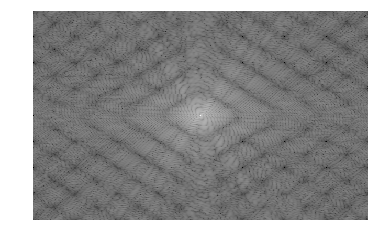

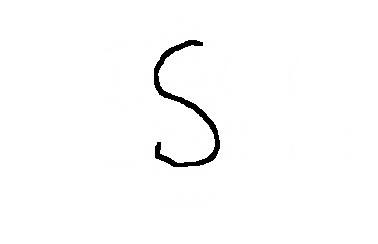

Power Value DiagonalSENW: 1.4731083307e+12
Power Value DiagonalSWNE : 1.20469689451e+12
Power value Verticle:  4.17059598453e+15
Power value Horizontal:  4.16949881823e+15
Power Value DiagonalSENW: 1.51005198315e+12
Power Value DiagonalSWNE : 1.47268614729e+12
Power value Verticle:  4.18110847589e+15
Power value Horizontal:  4.18140824404e+15
Power Value DiagonalSENW: 2.73764592826e+12
Power Value DiagonalSWNE : 1.77278202671e+12
Power value Verticle:  4.11390932406e+15
Power value Horizontal:  4.11042053478e+15
Power Value DiagonalSENW: 1.78374121949e+12
Power Value DiagonalSWNE : 1.2895073873e+12
Power value Verticle:  4.1603233966e+15
Power value Horizontal:  4.16063304931e+15
Power Value DiagonalSENW: 2.47267712437e+12
Power Value DiagonalSWNE : 1.42983788026e+12
Power value Verticle:  4.1185620842e+15
Power value Horizontal:  4.11320560628e+15
Power Value DiagonalSENW: 2.13694059004e+12
Power Value DiagonalSWNE : 1.33562684853e+12
Power value Verticle:  4.14853087872e+15
Power val

IsADirectoryError: [Errno 21] Is a directory: './characters/.ipynb_checkpoints'

In [4]:
# for python 2 compatibility #
from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
#                            #
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import os
# %matplotlib inline

##READ IMAGE 
f = io.imread('characters/S2.GIF')   # read in image
f_f = np.array(f, dtype=float)
z = np.fft.fft2(f_f)           # do fourier transform
q = np.fft.fftshift(z)         # puts u=0,v=0 in the centre

Magq =  np.absolute(q)         # magnitude spectrum
Phaseq = np.angle(q)           # phase spectrum
Power = np.absolute(q) ** 2    # power spectrum 

fig1 = plt.figure()
ax1  = fig1.add_subplot( 111 )
ax1.axis('off')
# Usually for viewing purposes:
ax1.imshow( np.log( np.absolute(q) + 1 ), cmap='gray' ) # io.

w = np.fft.ifft2( np.fft.ifftshift(q) ) # do inverse fourier transform
#
fig2 = plt.figure()
ax2  = fig2.add_subplot( 111 )
ax2.axis('off')
ax2.imshow( np.array(w,dtype=int), cmap='gray' ) # io.

plt.show()

#----------------------------------------------------------------------------
#Dimensions
fourierSize = Magq.shape;
fourierSizeHalf = np.divide(fourierSize, 2);
#Percentage Dimensions e.g 5%
PercentDimensions = np.floor(np.multiply(np.divide(fourierSize, 100), 5))
a = np.array((fourierSize[1],0))
b = np.array((0, fourierSize[0]))
PercentDiagonalDimensions = int(np.floor(np.multiply(np.divide(np.linalg.norm(a - b), 100),5)))


#Diagonal SE NW Power value 5% each side
DSENWPower = np.copy(Power)
rectangleDiagonalSENWPower(DSENWPower, PercentDiagonalDimensions)

#Diagonal SW NE Power value 5% each side
DSWNEPower = np.copy(Power)
rectangleDiagonalSWNEPower(DSWNEPower, PercentDiagonalDimensions)

#Verticle Power Value 5% each side
VPower = np.copy(Power)
lowerx = int(fourierSizeHalf[1] - PercentDimensions[1])
upperx = int(fourierSizeHalf[1] + PercentDimensions[1])
verticlePowerValue(lowerx, upperx, 0, fourierSize[0], VPower)
#setRectangleBlack(lowerx, upperx, 0, fourierSize[0], VPower)
#printFFT(VPower)


#Horizontal Power Value 5% each side
HPower = np.copy(Power)
lowery = int(fourierSizeHalf[0] - PercentDimensions[0])
uppery = int(fourierSizeHalf[0] + PercentDimensions[0])
horizontalPowerValue(0, fourierSize[1], lowery, uppery, HPower)
#setRectangleBlack(0, fourierSize[1], lowery, uppery, HPower)
#printFFT(HPower)


label_vector = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

def create_classifier():
    training_data = []
    source = os.listdir('./characters')
    for index, file in enumerate(source):
        filename = './characters/'+str(file)
        training_data.append(return_features(filename))
    neigh = KNeighborsClassifier(n_neighbors = 1)
    neigh.fit(training_data, label_vector)
    for weights in ['uniform', 'distance']:
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = training_data[:, 0].min() - 1, training_data[:, 0].max() + 1
        y_min, y_max = training_data[:, 1].min() - 1, training_data[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
        Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Plot also the training points
        plt.scatter(training_data[:, 0], training_data[:, 1], c=y, cmap=cmap_bold)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("3-Class classification (k = %i, weights = '%s')"
                  % (n_neighbors, weights))

    plt.show()
    return neigh

neighobject = create_classifier()



neighobject.predict(return_features('./testcharacters/S_T.gif'))
        

#Inverse Fourier after removing horizontal bar and verticle bar
#HMag = np.copy(Magq)
#q1 = np.copy(q)
#setRectangleBlack(0, fourierSize[1], lowery, uppery, HMag)
#setRectangleBlack(lowerx, upperx, 0, fourierSize[0], HMag)
#for y in range(fourierSize[0]):
#    for x in range(fourierSize[1]):
#        if(HMag[y,x] == 0 ):
#            q1[y,x] = 0
#w = np.fft.ifft2( np.fft.ifftshift(q1) ) # do inverse fourier transform
#fig2 = plt.figure()
#ax2  = fig2.add_subplot( 111 )
#ax2.axis('off')
#ax2.imshow( np.array(w,dtype=int), cmap='gray' ) # io.
#print ("Inverse fourier of 5% horizontal and verticle bars removed")
#plt.show()





C:\Users\Stefan\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: ComplexWarning: Casting complex values to real discards the imaginary part


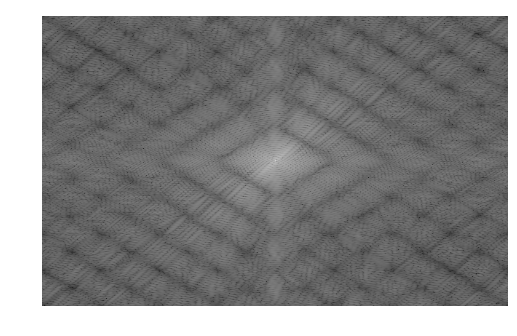

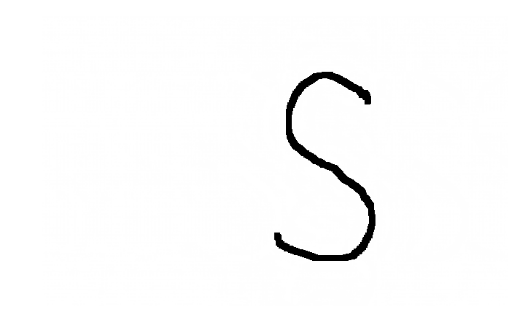

Power Value DiagonalSENW: 1.7952090693e+12
Power Value DiagonalSWNE : 1.25733186867e+12


NameError: name 'fivePercentDimensions' is not defined

In [6]:
# for python 2 compatibility #
from __future__ import print_function
import numpy as np
#                            #
from skimage import io
import matplotlib.pyplot as plt
# %matplotlib inline

##READ IMAGE 
f = io.imread('characters/S3.gif')   # read in image
f_f = np.array(f, dtype=float)
z = np.fft.fft2(f_f)           # do fourier transform
q = np.fft.fftshift(z)         # puts u=0,v=0 in the centre
Magq =  np.absolute(q)         # magnitude spectrum
Phaseq = np.angle(q)           # phase spectrum
Power = np.absolute(q) ** 2    # power spectrum 

fig1 = plt.figure()
ax1  = fig1.add_subplot( 111 )
ax1.axis('off')
# Usually for viewing purposes:
ax1.imshow( np.log( np.absolute(q) + 1 ), cmap='gray' ) # io.

w = np.fft.ifft2( np.fft.ifftshift(q) ) # do inverse fourier transform
#
fig2 = plt.figure()
ax2  = fig2.add_subplot( 111 )
ax2.axis('off')
ax2.imshow( np.array(w,dtype=int), cmap='gray' ) # io.

plt.show()
#---------------------------------------------------
#Dimensions
fourierSize = Magq.shape;
fourierSizeHalf = np.divide(fourierSize, 2);
#Percentage Dimensions e.g 5%
PercentDimensions = np.floor(np.multiply(np.divide(fourierSize, 100), 5))
a = np.array((fourierSize[1],0))
b = np.array((0, fourierSize[0]))
PercentDiagonalDimensions = int(np.floor(np.multiply(np.divide(np.linalg.norm(a - b), 100),5)))

#Diagonal SE NW Power value 5% each side
DSENWPower = np.copy(Power)
rectangleDiagonalSENWPower(DSENWPower, PercentDiagonalDimensions)

#Diagonal SW NE Power value 5% each side
DSWNEPower = np.copy(Power)
rectangleDiagonalSWNEPower(DSWNEPower, PercentDiagonalDimensions)

#Verticle Power Value 5% each side
VPower = np.copy(Power)
lowerx = int(fourierSizeHalf[1] - fivePercentDimensions[1])
upperx = int(fourierSizeHalf[1] + fivePercentDimensions[1])
verticlePowerValue(lowerx, upperx, 0, fourierSize[0], VPower)
#setRectangleBlack(lowerx, upperx, 0, fourierSize[0], VPower)
#printFFT(VPower)


#Horizontal Power Value 5% each side
HPower = np.copy(Power)
lowery = int(fourierSizeHalf[0] - fivePercentDimensions[0])
uppery = int(fourierSizeHalf[0] + fivePercentDimensions[0])
horizontalPowerValue(0, fourierSize[1], lowery, uppery, HPower)
#setRectangleBlack(0, fourierSize[1], lowery, uppery, HPower)
#printFFT(HPower)



In [ ]:
# for python 2 compatibility #
from __future__ import print_function
#                            #
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
# %matplotlib inline

##READ IMAGE 
f = io.imread('characters/T2.gif')   # read in image
f_f = np.array(f, dtype=float)
z = np.fft.fft2(f_f)           # do fourier transform
q = np.fft.fftshift(z)         # puts u=0,v=0 in the centre
Magq =  np.absolute(q)         # magnitude spectrum
Phaseq = np.angle(q)           # phase spectrum
Power = np.absolute(q) ** 2    # power spectrum 

fig1 = plt.figure()
ax1  = fig1.add_subplot( 111 )
ax1.axis('off')
# Usually for viewing purposes:
ax1.imshow( np.log( np.absolute(q) + 1 ), cmap='gray' ) # io.

w = np.fft.ifft2( np.fft.ifftshift(q) ) # do inverse fourier transform
#
fig2 = plt.figure()
ax2  = fig2.add_subplot( 111 )
ax2.axis('off')
ax2.imshow( np.array(w,dtype=int), cmap='gray' ) # io.

plt.show()

#---------------------------------------------------
#Dimensions
fourierSize = Magq.shape;
fourierSizeHalf = np.divide(fourierSize, 2);
#Percentage Dimensions e.g 5%
PercentDimensions = np.floor(np.multiply(np.divide(fourierSize, 100), 5))
a = np.array((fourierSize[1],0))
b = np.array((0, fourierSize[0]))
PercentDiagonalDimensions = int(np.floor(np.multiply(np.divide(np.linalg.norm(a - b), 100),5)))

#Diagonal SE NW Power value 5% each side
DSENWPower = np.copy(Power)
rectangleDiagonalSENWPower(DSENWPower, PercentDiagonalDimensions)

#Diagonal SW NE Power value 5% each side
DSWNEPower = np.copy(Power)
rectangleDiagonalSWNEPower(DSWNEPower, PercentDiagonalDimensions)

#Verticle Power Value 5% each side
VPower = np.copy(Power)
lowerx = int(fourierSizeHalf[1] - fivePercentDimensions[1])
upperx = int(fourierSizeHalf[1] + fivePercentDimensions[1])
verticlePowerValue(lowerx, upperx, 0, fourierSize[0], VPower)
#setRectangleBlack(lowerx, upperx, 0, fourierSize[0], VPower)
#printFFT(VPower)


#Horizontal Power Value 5% each side
HPower = np.copy(Power)
lowery = int(fourierSizeHalf[0] - fivePercentDimensions[0])
uppery = int(fourierSizeHalf[0] + fivePercentDimensions[0])
horizontalPowerValue(0, fourierSize[1], lowery, uppery, HPower)
#setRectangleBlack(0, fourierSize[1], lowery, uppery, HPower)
#printFFT(HPower)


In [ ]:
# for python 2 compatibility #
from __future__ import print_function
#                            #
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
# %matplotlib inline

##READ IMAGE 
f = io.imread('characters/T1.gif')   # read in image
f_f = np.array(f, dtype=float)
z = np.fft.fft2(f_f)           # do fourier transform
q = np.fft.fftshift(z)         # puts u=0,v=0 in the centre
Magq =  np.absolute(q)         # magnitude spectrum
Phaseq = np.angle(q)           # phase spectrum
Power = np.absolute(q) ** 2    # power spectrum 

fig1 = plt.figure()
ax1  = fig1.add_subplot( 111 )
ax1.axis('off')
# Usually for viewing purposes:
ax1.imshow( np.log( np.absolute(q) + 1 ), cmap='gray' ) # io.

w = np.fft.ifft2( np.fft.ifftshift(q) ) # do inverse fourier transform
#
fig2 = plt.figure()
ax2  = fig2.add_subplot( 111 )
ax2.axis('off')
ax2.imshow( np.array(w,dtype=int), cmap='gray' ) # io.

plt.show()

#----------------------------------------------------------------------------
#---------------------------------------------------
#Dimensions
fourierSize = Magq.shape;
fourierSizeHalf = np.divide(fourierSize, 2);
#Percentage Dimensions e.g 5%
PercentDimensions = np.floor(np.multiply(np.divide(fourierSize, 100), 5))
a = np.array((fourierSize[1],0))
b = np.array((0, fourierSize[0]))
PercentDiagonalDimensions = int(np.floor(np.multiply(np.divide(np.linalg.norm(a - b), 100),5)))

#Diagonal SE NW Power value 5% each side
DSENWPower = np.copy(Power)
rectangleDiagonalSENWPower(DSENWPower, PercentDiagonalDimensions)

#Diagonal SW NE Power value 5% each side
DSWNEPower = np.copy(Power)
rectangleDiagonalSWNEPower(DSWNEPower, PercentDiagonalDimensions)

#Verticle Power Value 5% each side
VPower = np.copy(Power)
lowerx = int(fourierSizeHalf[1] - fivePercentDimensions[1])
upperx = int(fourierSizeHalf[1] + fivePercentDimensions[1])
verticlePowerValue(lowerx, upperx, 0, fourierSize[0], VPower)
#setRectangleBlack(lowerx, upperx, 0, fourierSize[0], VPower)
#printFFT(VPower)


#Horizontal Power Value 5% each side
HPower = np.copy(Power)
lowery = int(fourierSizeHalf[0] - fivePercentDimensions[0])
uppery = int(fourierSizeHalf[0] + fivePercentDimensions[0])
horizontalPowerValue(0, fourierSize[1], lowery, uppery, HPower)
#setRectangleBlack(0, fourierSize[1], lowery, uppery, HPower)
#printFFT(HPower)





C:\Users\Stefan\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: ComplexWarning: Casting complex values to real discards the imaginary part


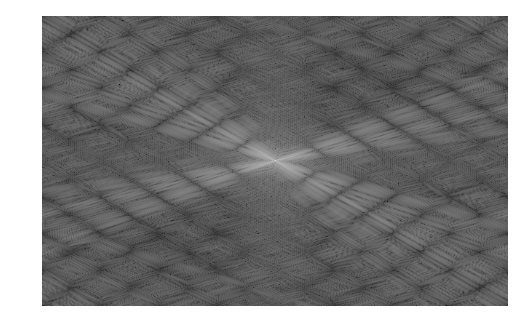

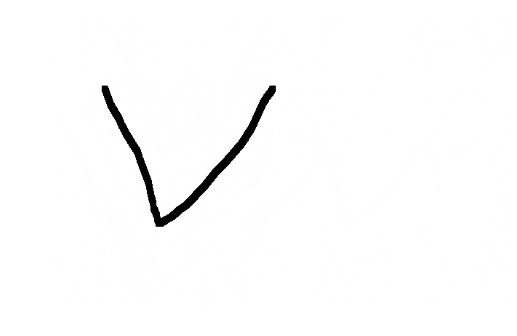

Power Value DiagonalSENW: 1.25551203292e+12
Power Value DiagonalSWNE : 1.61259671237e+12


NameError: name 'fivePercentDimensions' is not defined

In [8]:
# for python 2 compatibility #
from __future__ import print_function
#                            #
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
# %matplotlib inline

##READ IMAGE 
f = io.imread('characters/V1.gif')   # read in image
f_f = np.array(f, dtype=float)
z = np.fft.fft2(f_f)           # do fourier transform
q = np.fft.fftshift(z)         # puts u=0,v=0 in the centre
Magq =  np.absolute(q)         # magnitude spectrum
Phaseq = np.angle(q)           # phase spectrum
Power = np.absolute(q) ** 2    # power spectrum 

fig1 = plt.figure()
ax1  = fig1.add_subplot( 111 )
ax1.axis('off')
# Usually for viewing purposes:
ax1.imshow( np.log( np.absolute(q) + 1 ), cmap='gray' ) # io.

w = np.fft.ifft2( np.fft.ifftshift(q) ) # do inverse fourier transform
#
fig2 = plt.figure()
ax2  = fig2.add_subplot( 111 )
ax2.axis('off')
ax2.imshow( np.array(w,dtype=int), cmap='gray' ) # io.

plt.show()

#---------------------------------------------------
#Dimensions
fourierSize = Magq.shape;
fourierSizeHalf = np.divide(fourierSize, 2);
#Percentage Dimensions e.g 5%
PercentDimensions = np.floor(np.multiply(np.divide(fourierSize, 100), 5))
a = np.array((fourierSize[1],0))
b = np.array((0, fourierSize[0]))
PercentDiagonalDimensions = int(np.floor(np.multiply(np.divide(np.linalg.norm(a - b), 100),5)))

#Diagonal SE NW Power value 5% each side
DSENWPower = np.copy(Power)
rectangleDiagonalSENWPower(DSENWPower, PercentDiagonalDimensions)

#Diagonal SW NE Power value 5% each side
DSWNEPower = np.copy(Power)
rectangleDiagonalSWNEPower(DSWNEPower, PercentDiagonalDimensions)

#Verticle Power Value 5% each side
VPower = np.copy(Power)
lowerx = int(fourierSizeHalf[1] - fivePercentDimensions[1])
upperx = int(fourierSizeHalf[1] + fivePercentDimensions[1])
verticlePowerValue(lowerx, upperx, 0, fourierSize[0], VPower)
#setRectangleBlack(lowerx, upperx, 0, fourierSize[0], VPower)
#printFFT(VPower)


#Horizontal Power Value 5% each side
HPower = np.copy(Power)
lowery = int(fourierSizeHalf[0] - fivePercentDimensions[0])
uppery = int(fourierSizeHalf[0] + fivePercentDimensions[0])
horizontalPowerValue(0, fourierSize[1], lowery, uppery, HPower)
#setRectangleBlack(0, fourierSize[1], lowery, uppery, HPower)
#printFFT(HPower)


In [ ]:
# for python 2 compatibility #
from __future__ import print_function
#                            #
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
# %matplotlib inline

##READ IMAGE 
f = io.imread('characters/V2.gif')   # read in image
f_f = np.array(f, dtype=float)
z = np.fft.fft2(f_f)           # do fourier transform
q = np.fft.fftshift(z)         # puts u=0,v=0 in the centre
Magq =  np.absolute(q)         # magnitude spectrum
Phaseq = np.angle(q)           # phase spectrum
Power = np.absolute(q) ** 2    # power spectrum 

fig1 = plt.figure()
ax1  = fig1.add_subplot( 111 )
ax1.axis('off')
# Usually for viewing purposes:
ax1.imshow( np.log( np.absolute(q) + 1 ), cmap='gray' ) # io.

w = np.fft.ifft2( np.fft.ifftshift(q) ) # do inverse fourier transform
#
fig2 = plt.figure()
ax2  = fig2.add_subplot( 111 )
ax2.axis('off')
ax2.imshow( np.array(w,dtype=int), cmap='gray' ) # io.

plt.show()

#---------------------------------------------------
#Dimensions
fourierSize = Magq.shape;
fourierSizeHalf = np.divide(fourierSize, 2);
#Percentage Dimensions e.g 5%
PercentDimensions = np.floor(np.multiply(np.divide(fourierSize, 100), 5))
a = np.array((fourierSize[1],0))
b = np.array((0, fourierSize[0]))
PercentDiagonalDimensions = int(np.floor(np.multiply(np.divide(np.linalg.norm(a - b), 100),5)))

#Diagonal SE NW Power value 5% each side
DSENWPower = np.copy(Power)
rectangleDiagonalSENWPower(DSENWPower, PercentDiagonalDimensions)

#Diagonal SW NE Power value 5% each side
DSWNEPower = np.copy(Power)
rectangleDiagonalSWNEPower(DSWNEPower, PercentDiagonalDimensions)

#Verticle Power Value 5% each side
VPower = np.copy(Power)
lowerx = int(fourierSizeHalf[1] - fivePercentDimensions[1])
upperx = int(fourierSizeHalf[1] + fivePercentDimensions[1])
verticlePowerValue(lowerx, upperx, 0, fourierSize[0], VPower)
#setRectangleBlack(lowerx, upperx, 0, fourierSize[0], VPower)
#printFFT(VPower)


#Horizontal Power Value 5% each side
HPower = np.copy(Power)
lowery = int(fourierSizeHalf[0] - fivePercentDimensions[0])
uppery = int(fourierSizeHalf[0] + fivePercentDimensions[0])
horizontalPowerValue(0, fourierSize[1], lowery, uppery, HPower)
#setRectangleBlack(0, fourierSize[1], lowery, uppery, HPower)
#printFFT(HPower)


In [ ]:
# for python 2 compatibility #
from __future__ import print_function
#                            #
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
# %matplotlib inline

##READ IMAGE 
f = io.imread('characters/A1.gif')   # read in image
f_f = np.array(f, dtype=float)
z = np.fft.fft2(f_f)           # do fourier transform
q = np.fft.fftshift(z)         # puts u=0,v=0 in the centre
Magq =  np.absolute(q)         # magnitude spectrum
Phaseq = np.angle(q)           # phase spectrum
Power = np.absolute(q) ** 2    # power spectrum 

fig1 = plt.figure()
ax1  = fig1.add_subplot( 111 )
ax1.axis('off')
# Usually for viewing purposes:
ax1.imshow( np.log( np.absolute(q) + 1 ), cmap='gray' ) # io.

w = np.fft.ifft2( np.fft.ifftshift(q) ) # do inverse fourier transform
#
fig2 = plt.figure()
ax2  = fig2.add_subplot( 111 )
ax2.axis('off')
ax2.imshow( np.array(w,dtype=int), cmap='gray' ) # io.

plt.show()

#---------------------------------------------------
#Dimensions
fourierSize = Magq.shape;
fourierSizeHalf = np.divide(fourierSize, 2);
#Percentage Dimensions e.g 5%
PercentDimensions = np.floor(np.multiply(np.divide(fourierSize, 100), 5))
a = np.array((fourierSize[1],0))
b = np.array((0, fourierSize[0]))
PercentDiagonalDimensions = int(np.floor(np.multiply(np.divide(np.linalg.norm(a - b), 100),5)))

#Diagonal SE NW Power value 5% each side
DSENWPower = np.copy(Power)
rectangleDiagonalSENWPower(DSENWPower, PercentDiagonalDimensions)

#Diagonal SW NE Power value 5% each side
DSWNEPower = np.copy(Power)
rectangleDiagonalSWNEPower(DSWNEPower, PercentDiagonalDimensions)

#Verticle Power Value 5% each side
VPower = np.copy(Power)
lowerx = int(fourierSizeHalf[1] - fivePercentDimensions[1])
upperx = int(fourierSizeHalf[1] + fivePercentDimensions[1])
verticlePowerValue(lowerx, upperx, 0, fourierSize[0], VPower)
#setRectangleBlack(lowerx, upperx, 0, fourierSize[0], VPower)
#printFFT(VPower)


#Horizontal Power Value 5% each side
HPower = np.copy(Power)
lowery = int(fourierSizeHalf[0] - fivePercentDimensions[0])
uppery = int(fourierSizeHalf[0] + fivePercentDimensions[0])
horizontalPowerValue(0, fourierSize[1], lowery, uppery, HPower)
#setRectangleBlack(0, fourierSize[1], lowery, uppery, HPower)
#printFFT(HPower)


In [ ]:
# for python 2 compatibility #
from __future__ import print_function
#                            #
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
# %matplotlib inline

##READ IMAGE 
f = io.imread('characters/B1.gif')   # read in image
f_f = np.array(f, dtype=float)
z = np.fft.fft2(f_f)           # do fourier transform
q = np.fft.fftshift(z)         # puts u=0,v=0 in the centre
Magq =  np.absolute(q)         # magnitude spectrum
Phaseq = np.angle(q)           # phase spectrum
Power = np.absolute(q) ** 2    # power spectrum 

fig1 = plt.figure()
ax1  = fig1.add_subplot( 111 )
ax1.axis('off')
# Usually for viewing purposes:
ax1.imshow( np.log( np.absolute(q) + 1 ), cmap='gray' ) # io.

w = np.fft.ifft2( np.fft.ifftshift(q) ) # do inverse fourier transform
#
fig2 = plt.figure()
ax2  = fig2.add_subplot( 111 )
ax2.axis('off')
ax2.imshow( np.array(w,dtype=int), cmap='gray' ) # io.

plt.show()

#---------------------------------------------------
#Dimensions
fourierSize = Magq.shape;
fourierSizeHalf = np.divide(fourierSize, 2);
#Percentage Dimensions e.g 5%
PercentDimensions = np.floor(np.multiply(np.divide(fourierSize, 100), 5))
a = np.array((fourierSize[1],0))
b = np.array((0, fourierSize[0]))
PercentDiagonalDimensions = int(np.floor(np.multiply(np.divide(np.linalg.norm(a - b), 100),5)))

#Diagonal SE NW Power value 5% each side
DSENWPower = np.copy(Power)
rectangleDiagonalSENWPower(DSENWPower, PercentDiagonalDimensions)

#Diagonal SW NE Power value 5% each side
DSWNEPower = np.copy(Power)
rectangleDiagonalSWNEPower(DSWNEPower, PercentDiagonalDimensions)

#Verticle Power Value 5% each side
VPower = np.copy(Power)
lowerx = int(fourierSizeHalf[1] - fivePercentDimensions[1])
upperx = int(fourierSizeHalf[1] + fivePercentDimensions[1])
verticlePowerValue(lowerx, upperx, 0, fourierSize[0], VPower)
#setRectangleBlack(lowerx, upperx, 0, fourierSize[0], VPower)
#printFFT(VPower)


#Horizontal Power Value 5% each side
HPower = np.copy(Power)
lowery = int(fourierSizeHalf[0] - fivePercentDimensions[0])
uppery = int(fourierSizeHalf[0] + fivePercentDimensions[0])
horizontalPowerValue(0, fourierSize[1], lowery, uppery, HPower)
#setRectangleBlack(0, fourierSize[1], lowery, uppery, HPower)
#printFFT(HPower)
